# House Price Prediction in Australia

This project aims to build a model to **predict the house prices** in the Australian market. A regularized regression model will be built to find out which variables help in the prediction and by how well they influence the price. 

Libraries used: **Numpy, Pandas, Matplotlib, Seaborn, Scikit-Learn**

# List of Contents

1. Introduction
2. Data Cleaning
3. Exploratory Data Analysis
4. Model Building

## 1. Introduction

### 1.1 - Understanding the Business Problem

A US based housing company named Surprise Housing has decided to enter in the Australian housing market. Their business involves flipping houses purchased at below market price and selling them for a higher price. The company has collected a dataset of housing sales in Australia and wants us to build a model to predict the actual value of their prospective properties and help them decide whether to invest or not.

The company wants to know:

*  Which variables are significant in predicting the price of a house
*  How well these variables describe the price of the house

The model built will be used by the company's management to understand the dynamics of the Australian housing market and modify their strategy and concentrate on areas which will yield high returns.

### 1.2 - Data

The data for this project has two sources of data:

The first dataset *('train.csv')* contains various information about the houses sold and the sale details such as selling price, year sold, and house condition among others. 

The second dataset is just the data dictionary of the above dataset.

### 1.3 - Importing Modules and Data

In [1]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing modules for model building
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
# importing data
house_data = pd.read_csv(r'C:\Users\Avinash Bandlapalli\Desktop\Main Folder\Post Grad Diploma in Data Science\Courses\Course 4 - Machine Learning - 2\Module 3 - Advanced Regression Assignment\train.csv')

## 2. Data Cleaning

### 2.1 - Data Inspection

In [4]:
house_data.shape

(1460, 81)

In [5]:
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [7]:
house_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The dataset has 1460 rows and 81 columns. There are some columns with a couple of null values. There are 38 columns which have a numeric datatype.

### 2.2 - Data Cleaning

Treating null values and checking datatypes.

In [8]:
# checking percentage of null values
(100*house_data.isnull().sum()/len(house_data.index)).sort_values(ascending = False).head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Utilities        0.000000
dtype: float64

In [9]:
# null values in PoolQC, MiscFeature, Alley, Fence, FireplaceQu, MassVnrType, and all Garage related columns mean 0 quantity of that column
# these null values will be replaced by No_'column'
house_data.PoolQC.replace(np.nan, 'No_Pool', inplace=True)
house_data.MiscFeature.replace(np.nan, 'No_MiscFeature', inplace=True)
house_data.Alley.replace(np.nan, 'No_Alley', inplace=True)
house_data.Fence.replace(np.nan, 'No_Fence', inplace=True)
house_data.FireplaceQu.replace(np.nan, 'No_Fireplace', inplace=True)
house_data.MasVnrType.replace(np.nan, 'No_Veneer', inplace=True)
house_data.GarageCond.replace(np.nan, 'No_Garage', inplace=True)
house_data.GarageType.replace(np.nan, 'No_Garage', inplace=True)
house_data.GarageFinish.replace(np.nan, 'No_Garage', inplace=True)
house_data.GarageQual.replace(np.nan, 'No_Garage', inplace=True)

In [10]:
(100*house_data.isnull().sum()/len(house_data.index)).sort_values(ascending = False).head(10)

LotFrontage     17.739726
GarageYrBlt      5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtFinType1     2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
Electrical       0.068493
RoofStyle        0.000000
dtype: float64

In [11]:
# replacing null values in LotFrontage, MasVnrArea, and all Basement related columns. 
# categorical cols replaced with no_'column' and numeric cols with 0
house_data.LotFrontage.replace(np.nan, 0, inplace=True)
house_data.MasVnrArea.replace(np.nan, 0, inplace=True)

house_data.BsmtExposure.replace(np.nan, 'No_Basement', inplace=True)
house_data.BsmtQual.replace(np.nan, 'No_Basement', inplace=True)
house_data.BsmtCond.replace(np.nan, 'No_Basement', inplace=True)
house_data.BsmtFinType1.replace(np.nan, 'No_Basement', inplace=True)
house_data.BsmtFinType2.replace(np.nan, 'No_Basement', inplace=True)

In [12]:
# removing rows where GarageYrBlt or Electrical is null
house_data = house_data.loc[~pd.isnull(house_data.GarageYrBlt)]
house_data = house_data.loc[~pd.isnull(house_data.Electrical)]

In [13]:
(100*house_data.isnull().sum()/len(house_data.index)).sort_values(ascending = False).head()

SalePrice      0.0
Heating        0.0
RoofStyle      0.0
RoofMatl       0.0
Exterior1st    0.0
dtype: float64

In [14]:
house_data.shape

(1378, 81)

After treating null values, the dataframe has 1378 rows and 81 columns.

In [15]:
# changing datatypes of categorical columns of datatype int to object
house_data.MSSubClass = house_data.MSSubClass.astype('object')
house_data.OverallQual = house_data.OverallQual.astype('object')
house_data.OverallCond = house_data.OverallCond.astype('object')
house_data.BsmtFullBath = house_data.BsmtFullBath.astype('object')
house_data.BsmtHalfBath = house_data.BsmtHalfBath.astype('object')
house_data.FullBath = house_data.FullBath.astype('object')
house_data.HalfBath = house_data.HalfBath.astype('object')
house_data.BedroomAbvGr = house_data.BedroomAbvGr.astype('object')
house_data.KitchenAbvGr = house_data.KitchenAbvGr.astype('object')
house_data.TotRmsAbvGrd = house_data.TotRmsAbvGrd.astype('object')
house_data.Fireplaces = house_data.Fireplaces.astype('object')
house_data.GarageCars = house_data.GarageCars.astype('object')

In [16]:
# converting year columns to years since
house_data.YearBuilt = 2019 - house_data.YearBuilt
house_data.YearRemodAdd = 2019 - house_data.YearRemodAdd
house_data.GarageYrBlt = 2019 - house_data.GarageYrBlt
house_data.YrSold = 2019 - house_data.YrSold

In [17]:
# converting float cols to int cols
house_data.LotFrontage = house_data.LotFrontage.astype('int64')
house_data.MasVnrArea = house_data.MasVnrArea.astype('int64')
house_data.GarageYrBlt = house_data.GarageYrBlt.astype('int64')

In [18]:
# the final datatypes of the columns
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1378 entries, 0 to 1459
Data columns (total 81 columns):
Id               1378 non-null int64
MSSubClass       1378 non-null object
MSZoning         1378 non-null object
LotFrontage      1378 non-null int64
LotArea          1378 non-null int64
Street           1378 non-null object
Alley            1378 non-null object
LotShape         1378 non-null object
LandContour      1378 non-null object
Utilities        1378 non-null object
LotConfig        1378 non-null object
LandSlope        1378 non-null object
Neighborhood     1378 non-null object
Condition1       1378 non-null object
Condition2       1378 non-null object
BldgType         1378 non-null object
HouseStyle       1378 non-null object
OverallQual      1378 non-null object
OverallCond      1378 non-null object
YearBuilt        1378 non-null int64
YearRemodAdd     1378 non-null int64
RoofStyle        1378 non-null object
RoofMatl         1378 non-null object
Exterior1st      1378 no

## 3. Exploratory Data Analysis

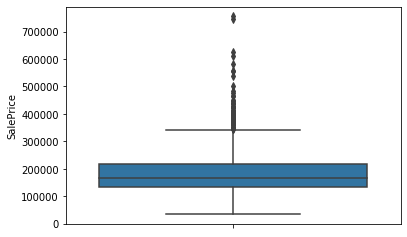

In [19]:
# analyzing target variable
sns.boxplot(data=house_data, y='SalePrice')

### 3.1 - Continuous Variables

In [20]:
def univariate_con(df,col1,col2):
    '''
    Univariate function will plot a Boxplot based on the parameters.
    df      : dataframe name
    col     : Column name
    '''
    sns.set(style="darkgrid")
    
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    sns.boxplot(data=df, y=col1)
    plt.subplot(122)
    sns.boxplot(data=df, y=col2)
    plt.show()

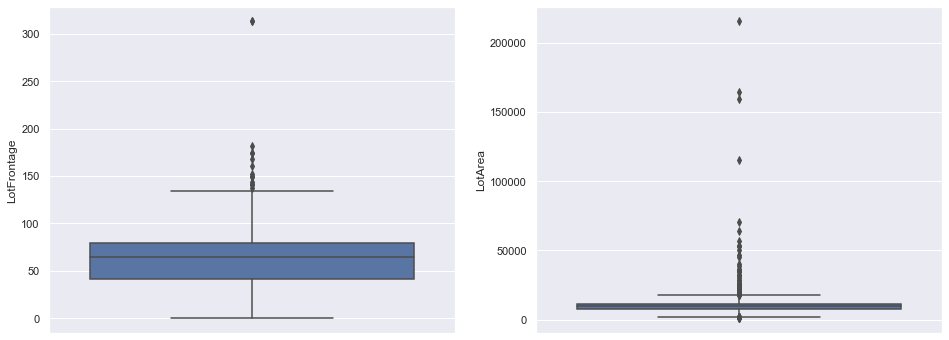

In [21]:
univariate_con(house_data,'LotFrontage','LotArea')

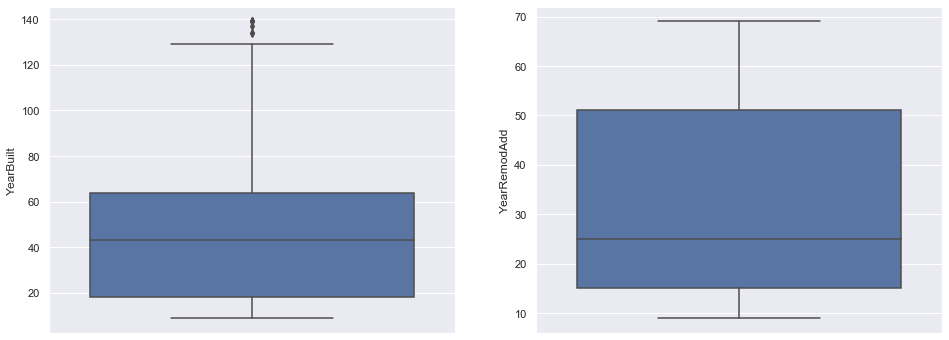

In [22]:
univariate_con(house_data,'YearBuilt','YearRemodAdd')

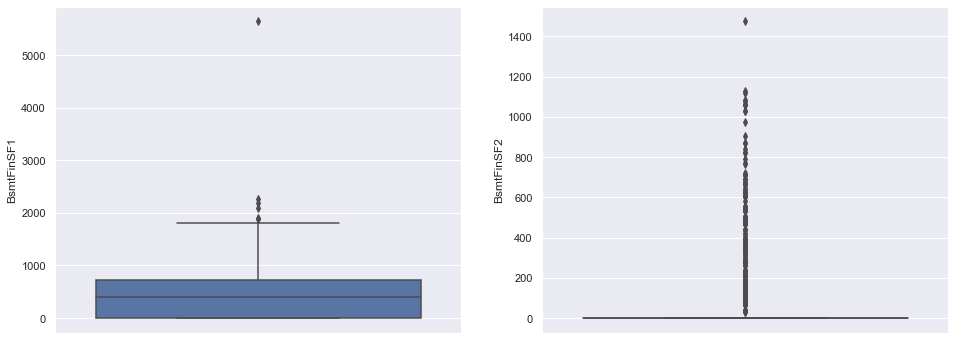

In [23]:
univariate_con(house_data,'BsmtFinSF1','BsmtFinSF2')

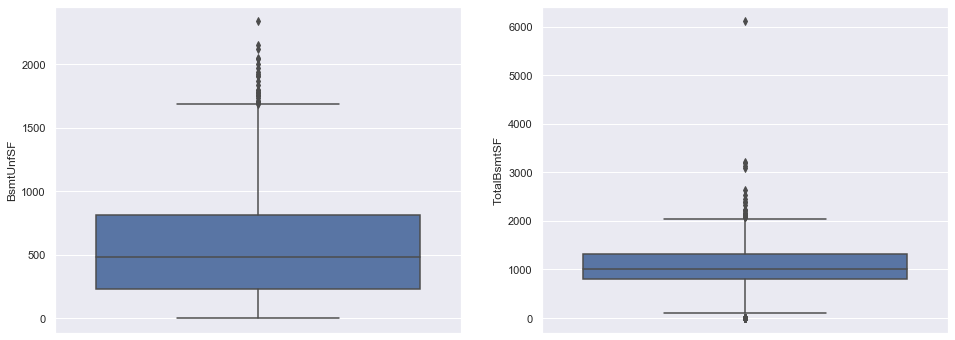

In [24]:
univariate_con(house_data,'BsmtUnfSF','TotalBsmtSF')

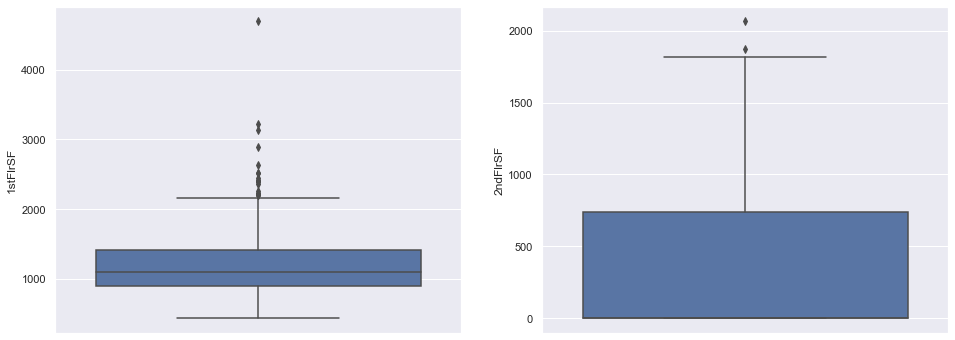

In [25]:
univariate_con(house_data,'1stFlrSF','2ndFlrSF')

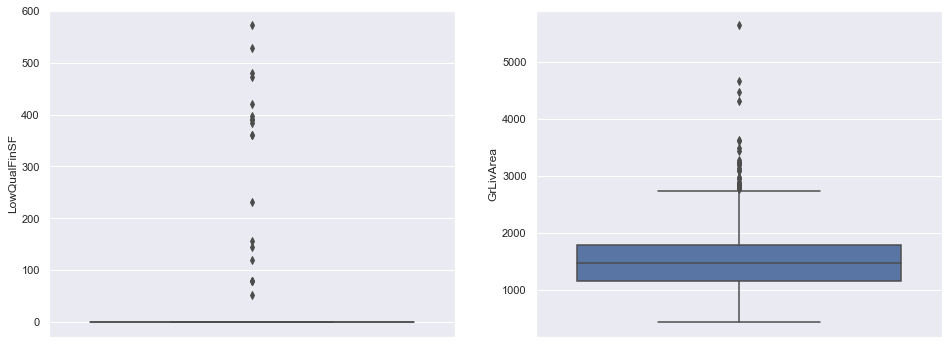

In [26]:
univariate_con(house_data,'LowQualFinSF','GrLivArea')

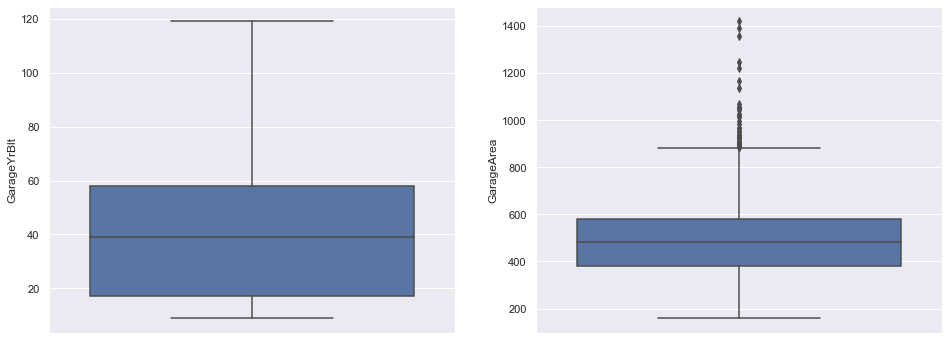

In [27]:
univariate_con(house_data,'GarageYrBlt','GarageArea')

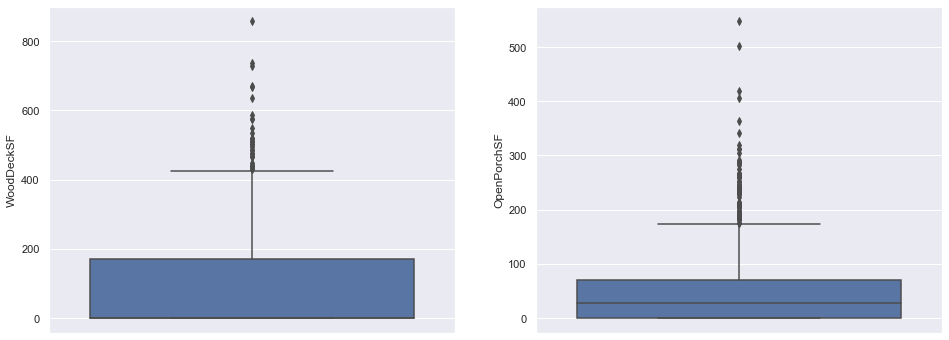

In [28]:
univariate_con(house_data,'WoodDeckSF','OpenPorchSF')

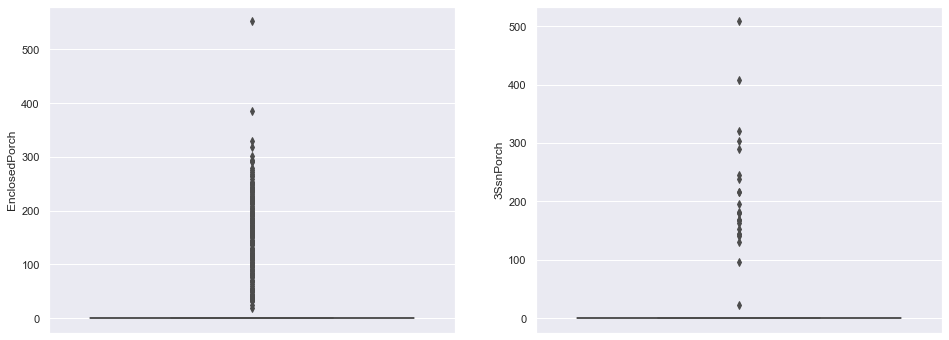

In [29]:
univariate_con(house_data,'EnclosedPorch','3SsnPorch')

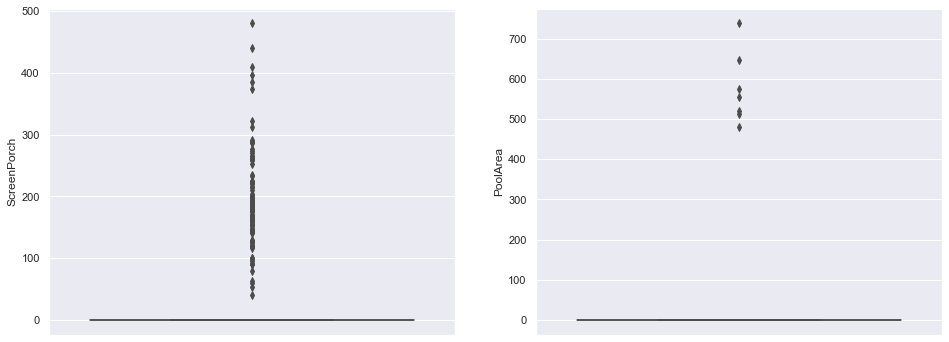

In [30]:
univariate_con(house_data,'ScreenPorch','PoolArea')

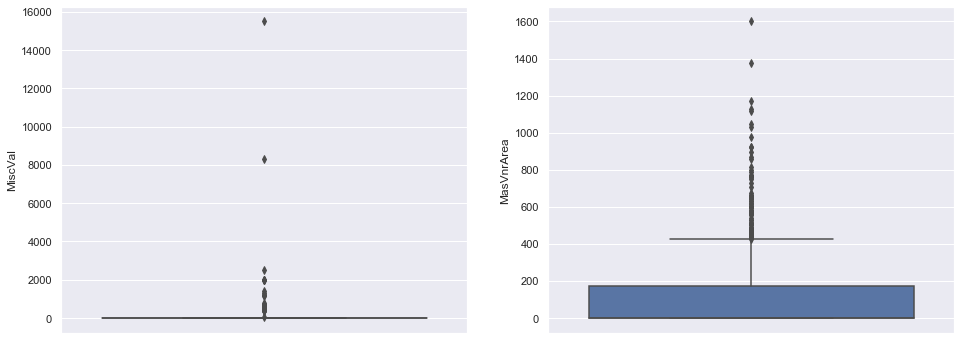

In [31]:
univariate_con(house_data,'MiscVal','MasVnrArea')

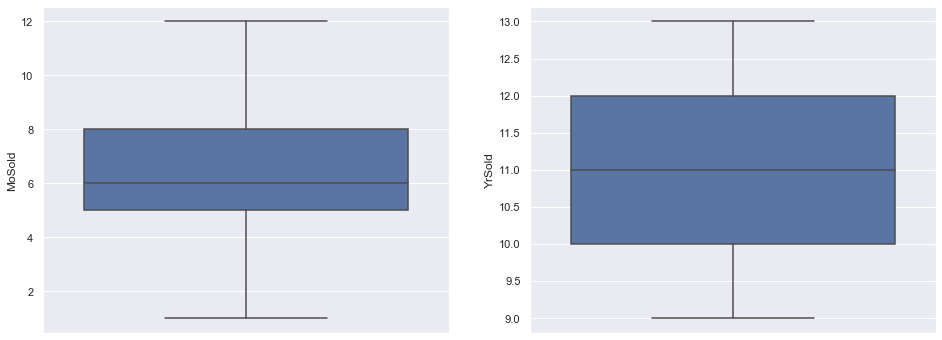

In [32]:
univariate_con(house_data,'MoSold','YrSold')

In [34]:
# outlier treatment for some of the columns above
Q1 = house_data['LotFrontage'].quantile(0.25)
Q3 = house_data['LotFrontage'].quantile(0.75)
IQR = Q3 - Q1
house_data = house_data.loc[(house_data['LotFrontage'] < Q3 + 1.5*IQR) & (house_data['LotFrontage'] > Q1 - IQR*1.5)]

Q1 = house_data['YearBuilt'].quantile(0.25)
Q3 = house_data['YearBuilt'].quantile(0.75)
IQR = Q3 - Q1
house_data = house_data.loc[(house_data['YearBuilt'] < Q3 + 1.5*IQR) & (house_data['YearBuilt'] > Q1 - IQR*1.5)]

Q1 = house_data['BsmtFinSF1'].quantile(0.25)
Q3 = house_data['BsmtFinSF1'].quantile(0.75)
IQR = Q3 - Q1
house_data = house_data.loc[(house_data['BsmtFinSF1'] < Q3 + 1.5*IQR) & (house_data['BsmtFinSF1'] > Q1 - IQR*1.5)]

Q1 = house_data['TotalBsmtSF'].quantile(0.25)
Q3 = house_data['TotalBsmtSF'].quantile(0.75)
IQR = Q3 - Q1
house_data = house_data.loc[(house_data['TotalBsmtSF'] < Q3 + 1.5*IQR) & (house_data['TotalBsmtSF'] > Q1 - IQR*1.5)]

Q1 = house_data['1stFlrSF'].quantile(0.25)
Q3 = house_data['1stFlrSF'].quantile(0.75)
IQR = Q3 - Q1
house_data = house_data.loc[(house_data['1stFlrSF'] < Q3 + 1.5*IQR) & (house_data['1stFlrSF'] > Q1 - IQR*1.5)]

Q1 = house_data['2ndFlrSF'].quantile(0.25)
Q3 = house_data['2ndFlrSF'].quantile(0.75)
IQR = Q3 - Q1
house_data = house_data.loc[(house_data['2ndFlrSF'] < Q3 + 1.5*IQR) & (house_data['2ndFlrSF'] > Q1 - IQR*1.5)]

Q1 = house_data['GrLivArea'].quantile(0.25)
Q3 = house_data['GrLivArea'].quantile(0.75)
IQR = Q3 - Q1
house_data = house_data.loc[(house_data['GrLivArea'] < Q3 + 1.5*IQR) & (house_data['GrLivArea'] > Q1 - IQR*1.5)]

Q1 = house_data['LotArea'].quantile(0.25)
Q3 = house_data['LotArea'].quantile(0.75)
IQR = Q3 - Q1
house_data = house_data.loc[(house_data['LotArea'] < Q3 + 1.5*IQR) & (house_data['LotArea'] > Q1 - IQR*1.5)]

Q1 = house_data['SalePrice'].quantile(0.25)
Q3 = house_data['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
house_data = house_data.loc[(house_data['SalePrice'] < Q3 + 1.5*IQR) & (house_data['SalePrice'] > Q1 - IQR*1.5)]

In [35]:
house_data.shape

(1165, 81)

### 3.2 - Categorical Variables

In [36]:
# Function to plot graphs for univariate analysis based on type of variable
def univariate_cat(df,col,hue =None):
    
    '''
    Univariate_cat function will plot a Countplot based on the parameters for categorical variables.
    df      : dataframe name
    col     : Column name
    hue     : (optional) Can analyze with respect to another categorical variable.
    
    '''
    sns.set(style="darkgrid")
   
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 6 + 4*len(temp.unique())
    fig.set_size_inches(width , 7)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue)
    del temp
    plt.show()

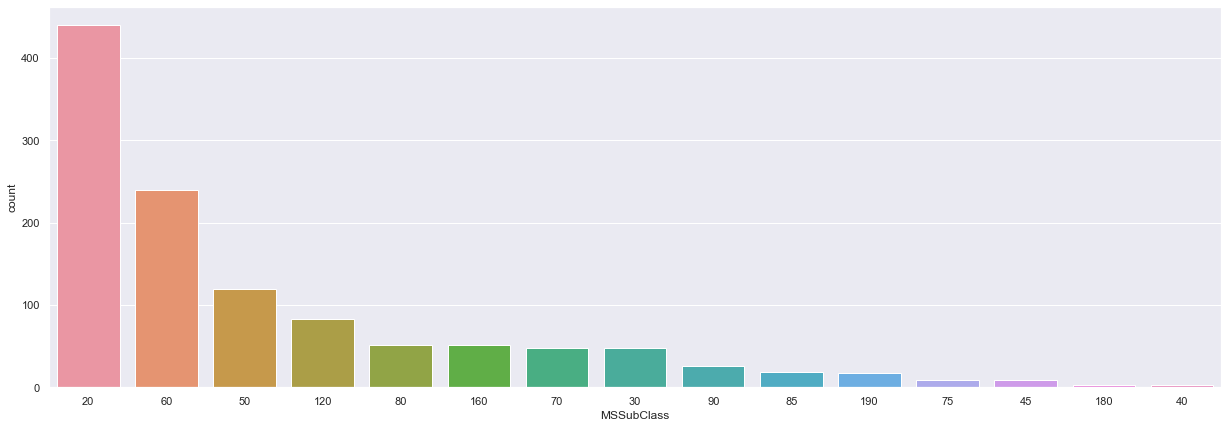

In [37]:
univariate_cat(house_data, 'MSSubClass')

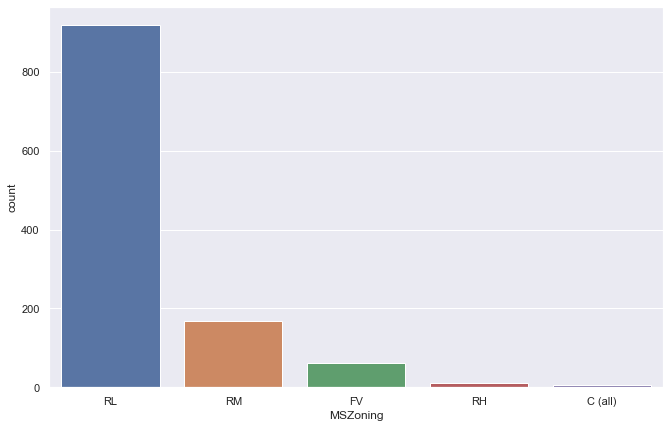

In [38]:
univariate_cat(house_data, 'MSZoning')

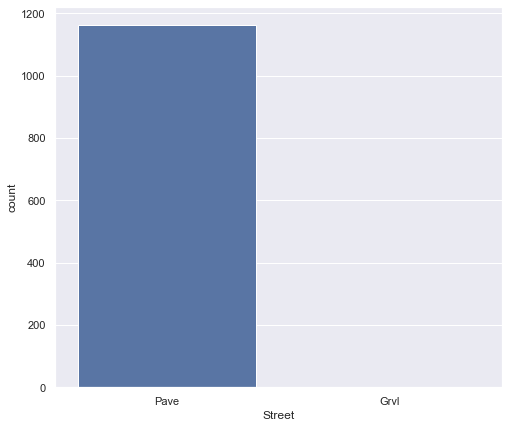

In [39]:
univariate_cat(house_data, 'Street')

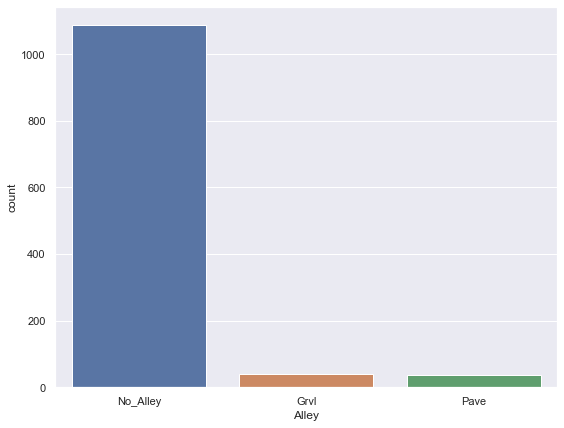

In [40]:
univariate_cat(house_data, 'Alley')

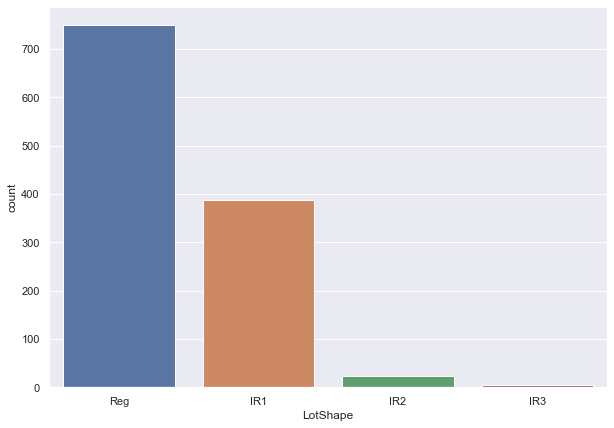

In [41]:
univariate_cat(house_data, 'LotShape')

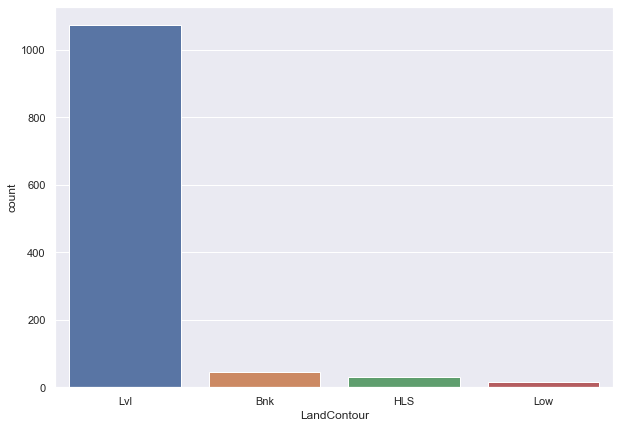

In [42]:
univariate_cat(house_data, 'LandContour')

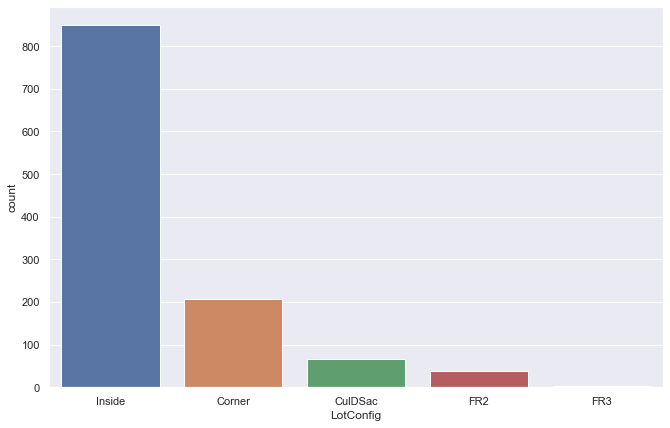

In [43]:
univariate_cat(house_data, 'LotConfig')

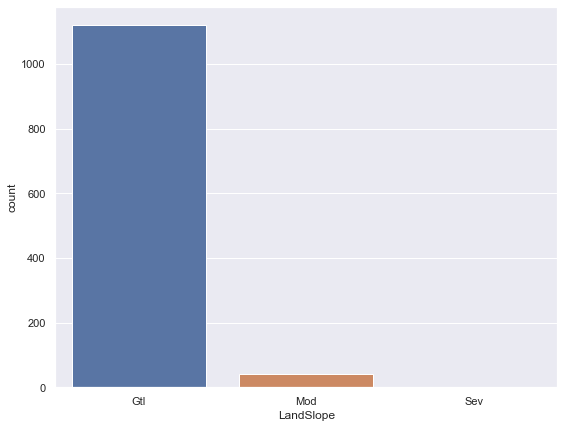

In [44]:
univariate_cat(house_data, 'LandSlope')

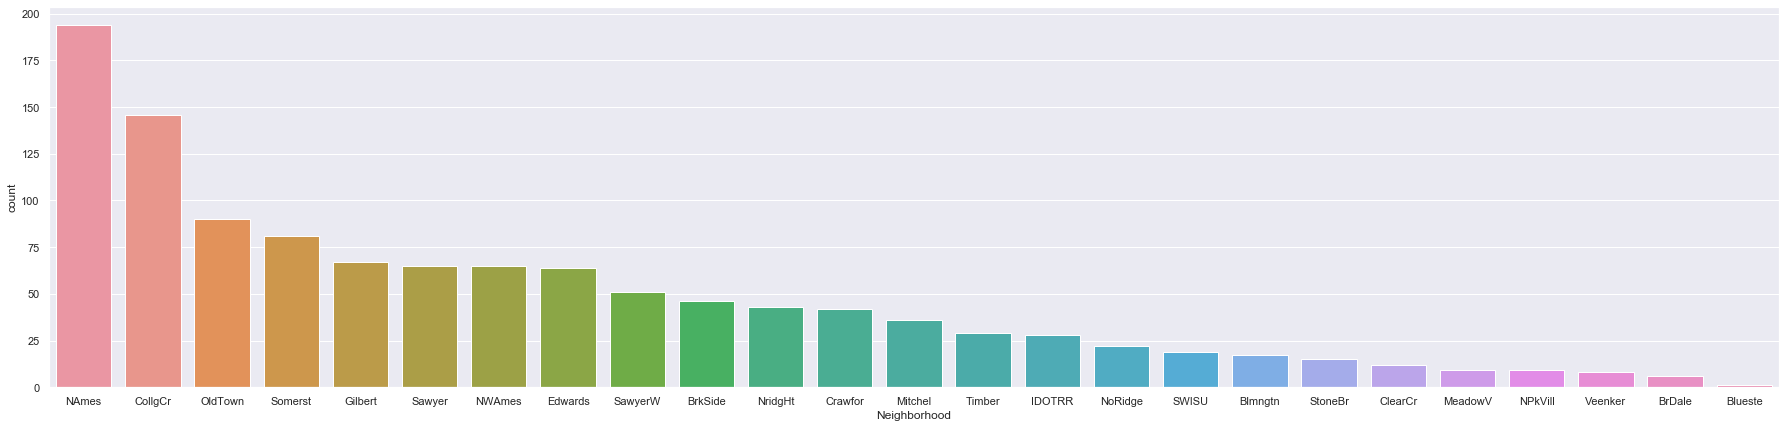

In [45]:
univariate_cat(house_data, 'Neighborhood')

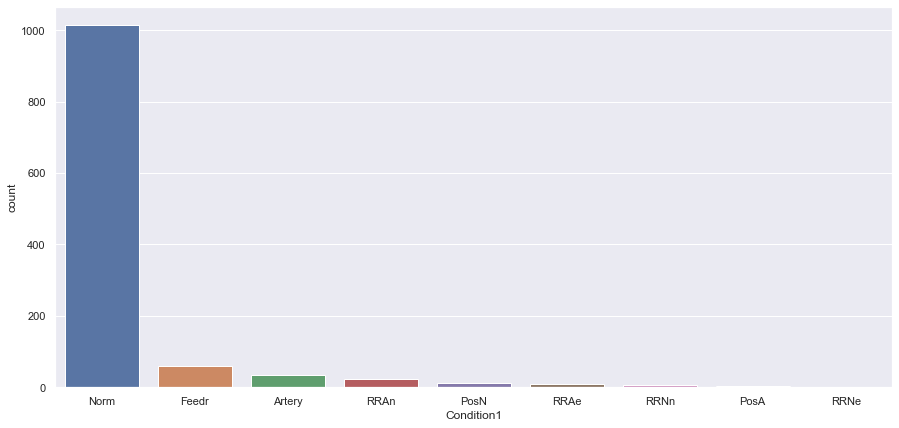

In [46]:
univariate_cat(house_data, 'Condition1')

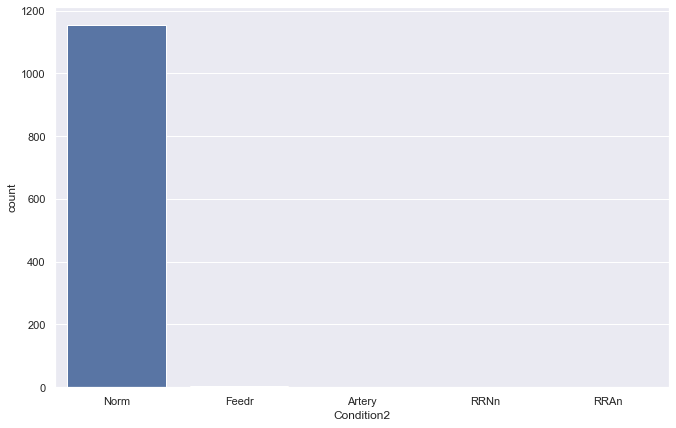

In [47]:
univariate_cat(house_data, 'Condition2')

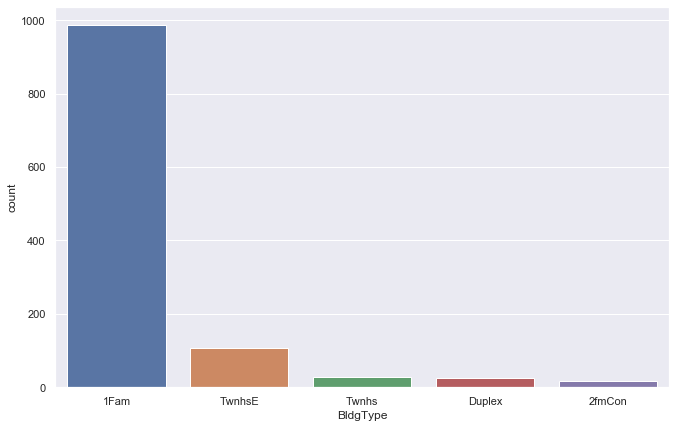

In [48]:
univariate_cat(house_data, 'BldgType')

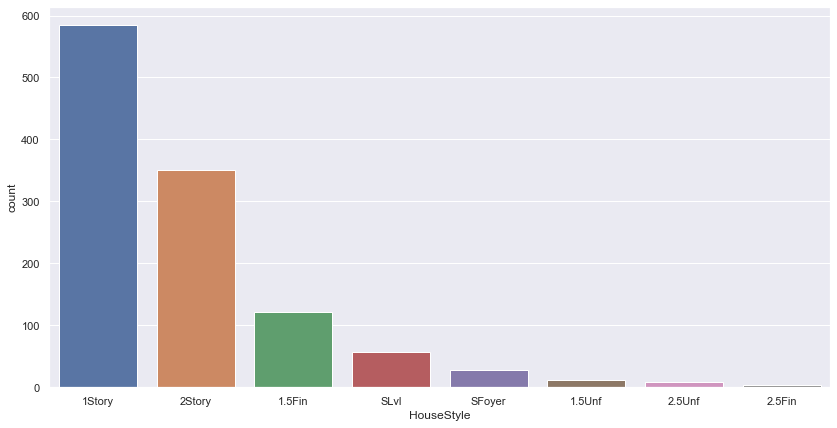

In [49]:
univariate_cat(house_data, 'HouseStyle')

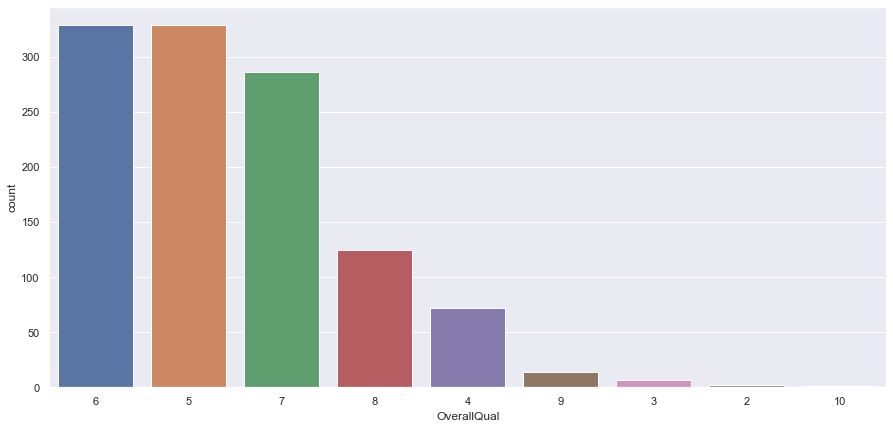

In [50]:
univariate_cat(house_data, 'OverallQual')

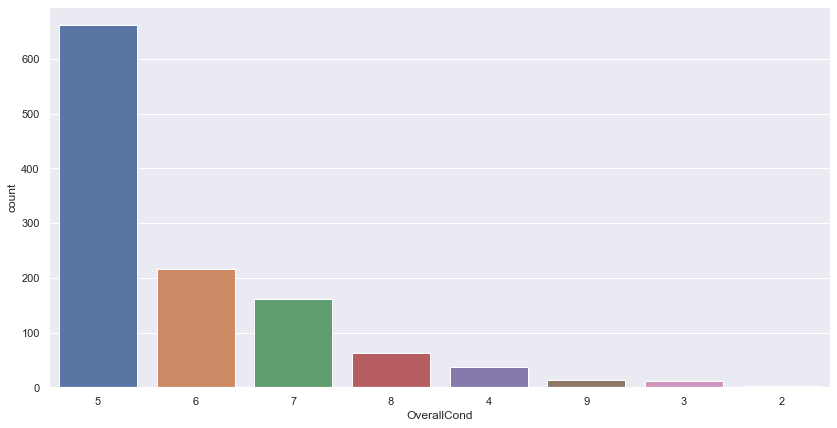

In [51]:
univariate_cat(house_data, 'OverallCond')

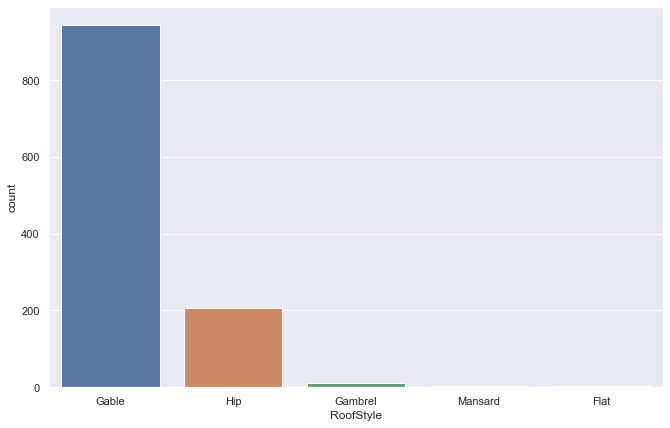

In [52]:
univariate_cat(house_data, 'RoofStyle')

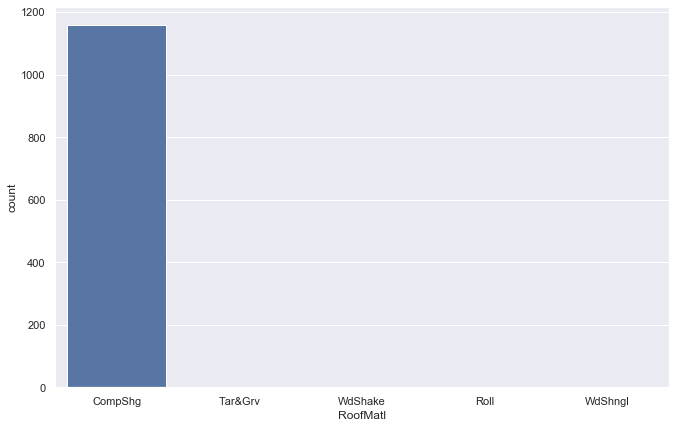

In [53]:
univariate_cat(house_data, 'RoofMatl')

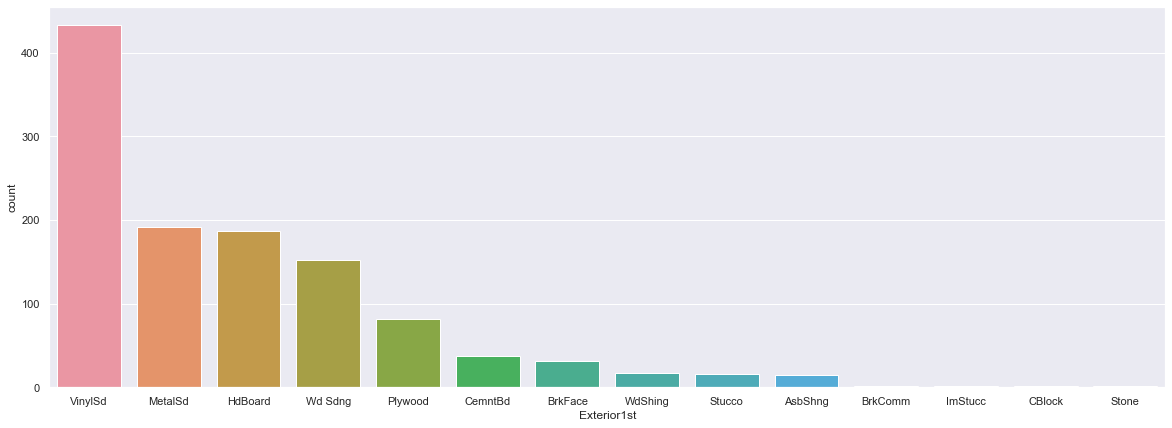

In [54]:
univariate_cat(house_data, 'Exterior1st')

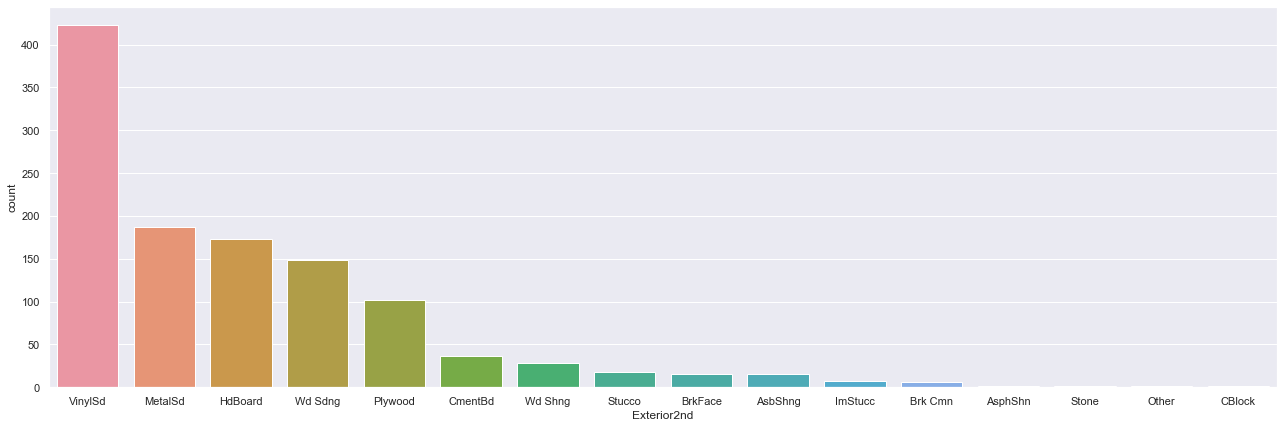

In [55]:
univariate_cat(house_data, 'Exterior2nd')

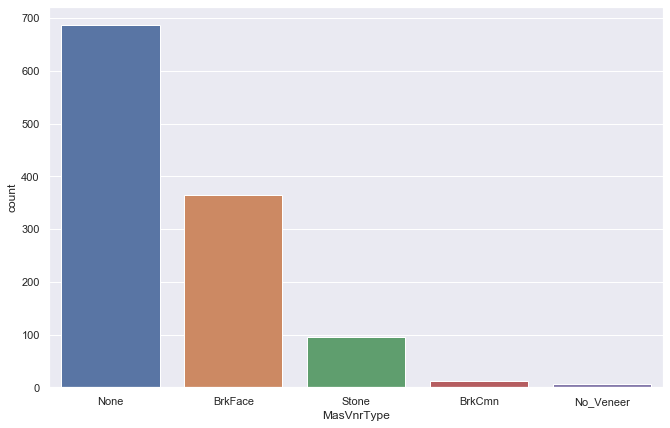

In [56]:
univariate_cat(house_data, 'MasVnrType')

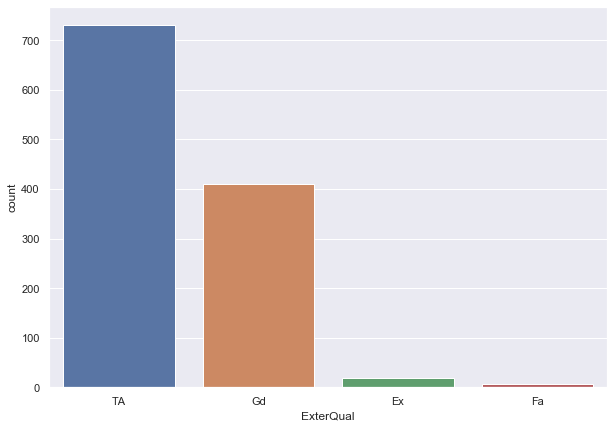

In [57]:
univariate_cat(house_data, 'ExterQual')

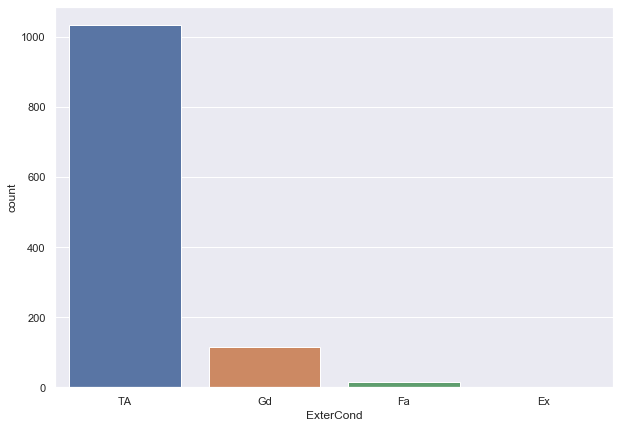

In [58]:
univariate_cat(house_data, 'ExterCond')

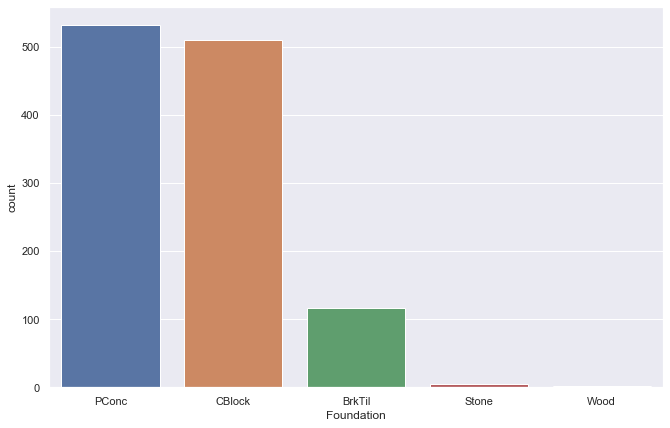

In [59]:
univariate_cat(house_data, 'Foundation')

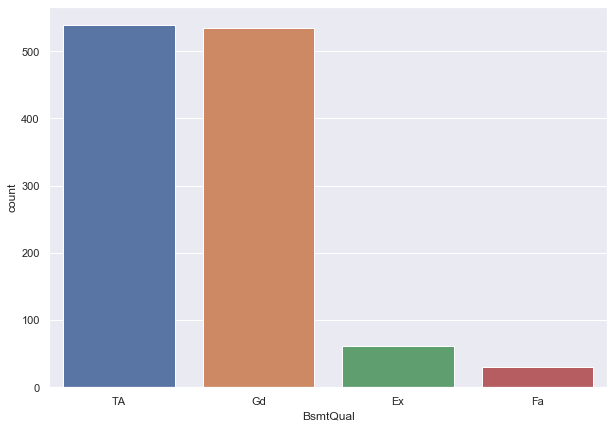

In [60]:
univariate_cat(house_data, 'BsmtQual')

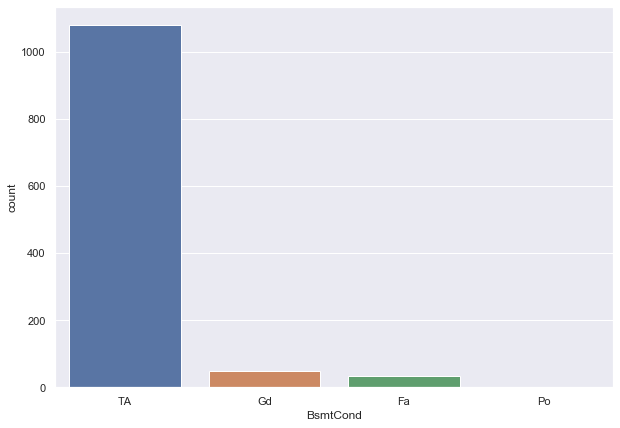

In [61]:
univariate_cat(house_data, 'BsmtCond')

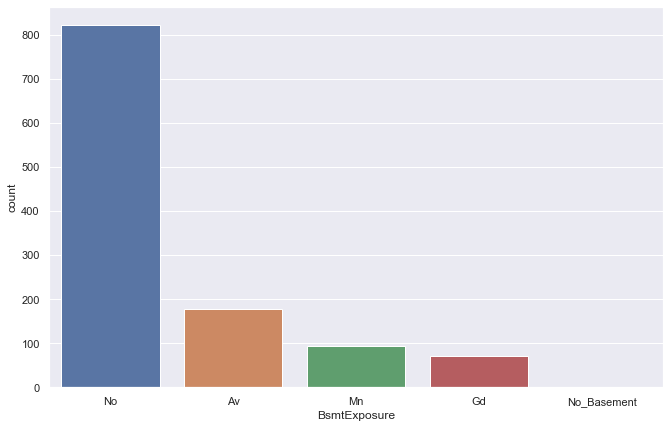

In [62]:
univariate_cat(house_data, 'BsmtExposure')

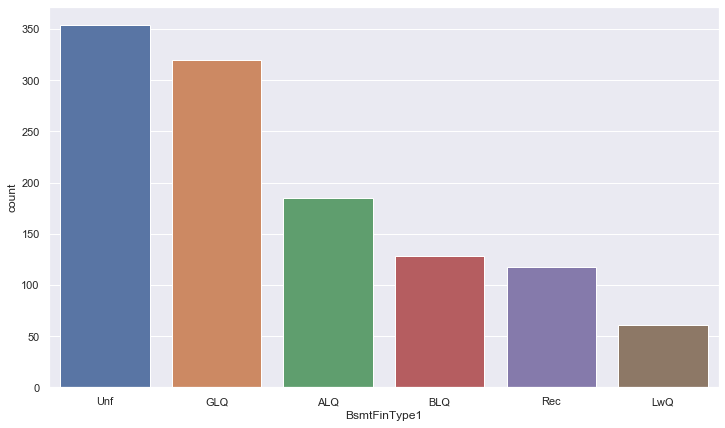

In [63]:
univariate_cat(house_data, 'BsmtFinType1')

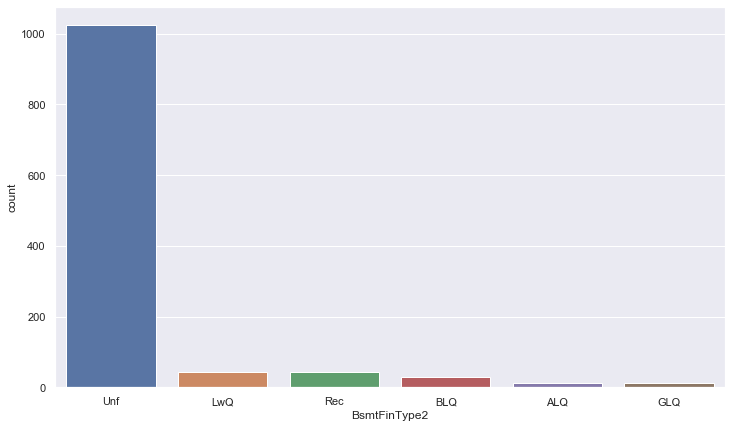

In [64]:
univariate_cat(house_data, 'BsmtFinType2')

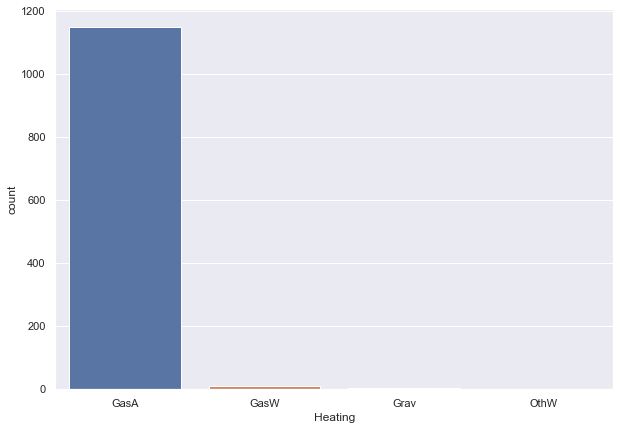

In [65]:
univariate_cat(house_data, 'Heating')

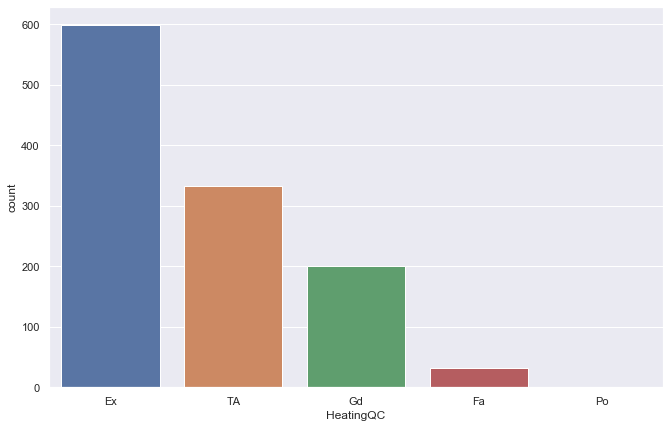

In [66]:
univariate_cat(house_data, 'HeatingQC')

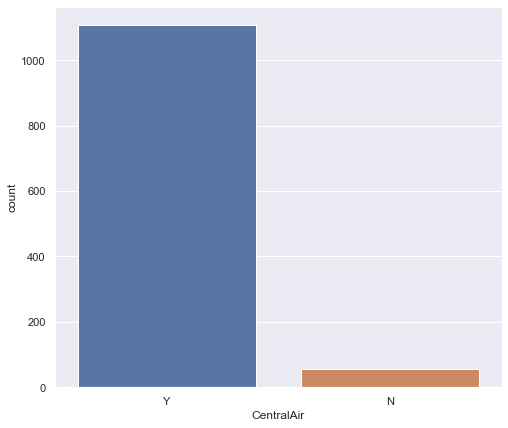

In [67]:
univariate_cat(house_data, 'CentralAir')

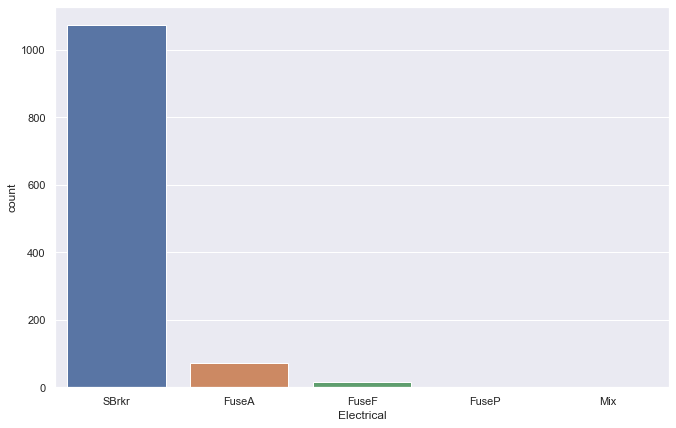

In [68]:
univariate_cat(house_data, 'Electrical')

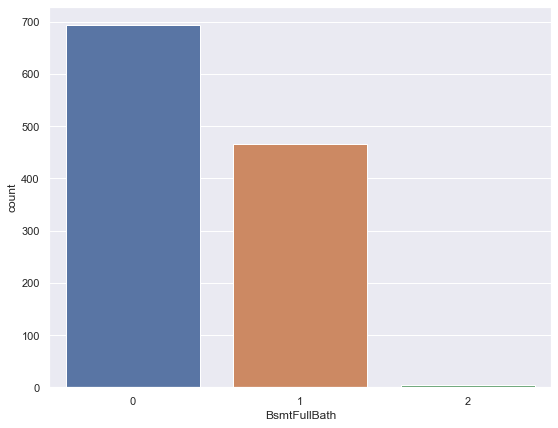

In [69]:
univariate_cat(house_data, 'BsmtFullBath')

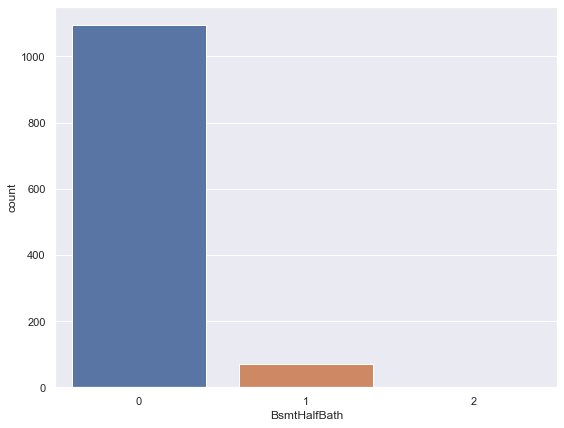

In [70]:
univariate_cat(house_data, 'BsmtHalfBath')

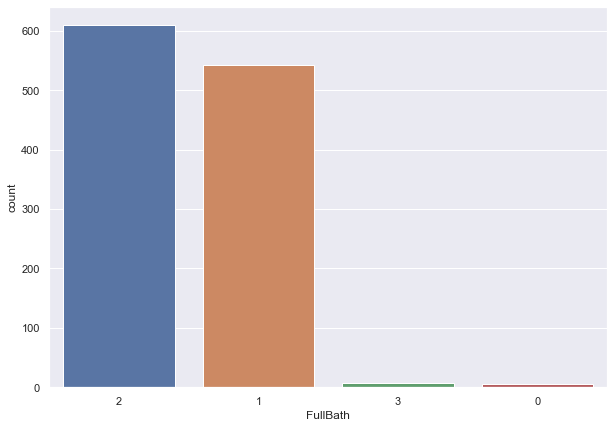

In [71]:
univariate_cat(house_data, 'FullBath')

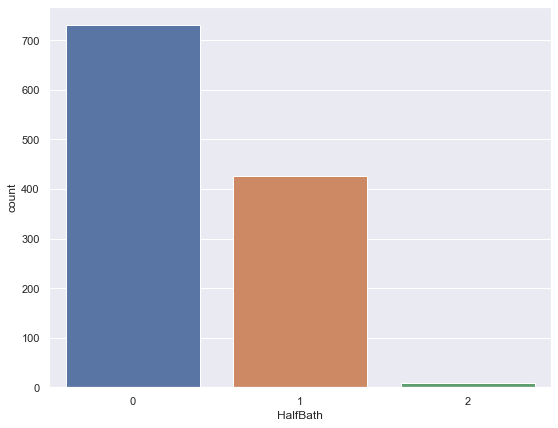

In [72]:
univariate_cat(house_data, 'HalfBath')

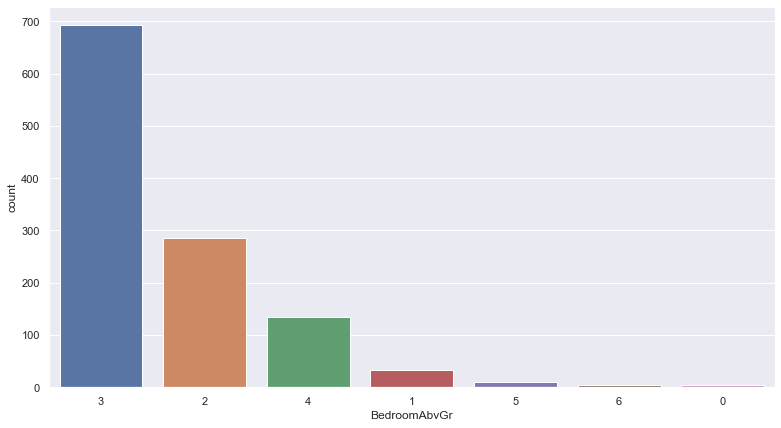

In [73]:
univariate_cat(house_data, 'BedroomAbvGr')

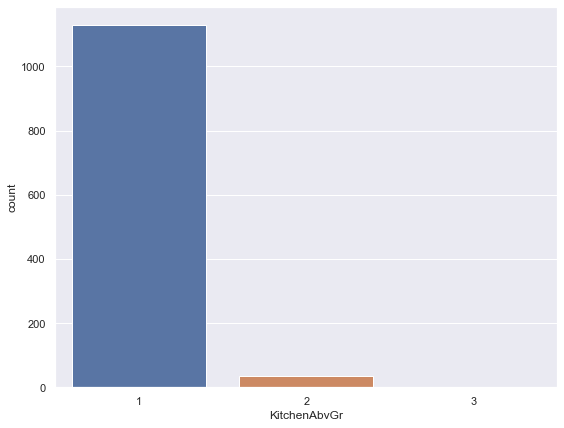

In [74]:
univariate_cat(house_data, 'KitchenAbvGr')

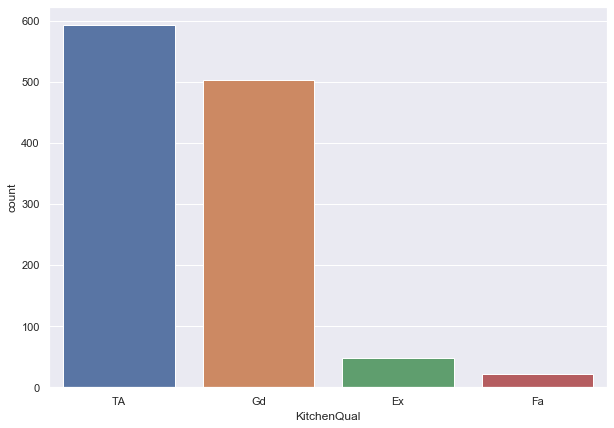

In [75]:
univariate_cat(house_data, 'KitchenQual')

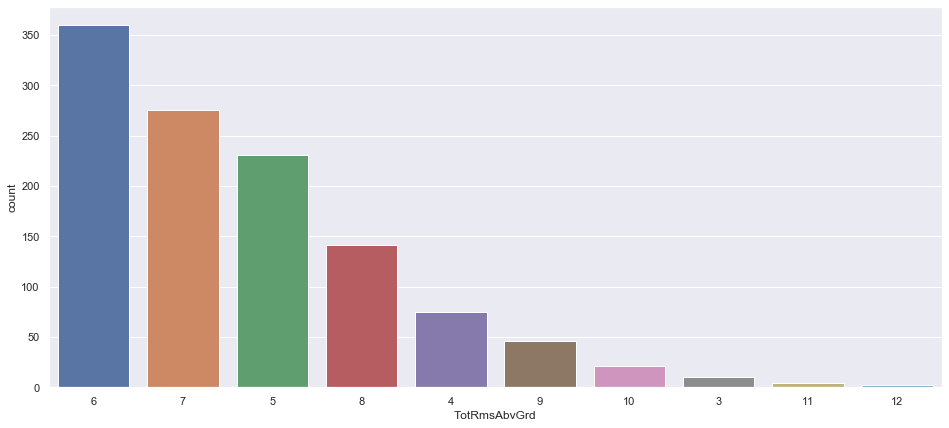

In [76]:
univariate_cat(house_data, 'TotRmsAbvGrd')

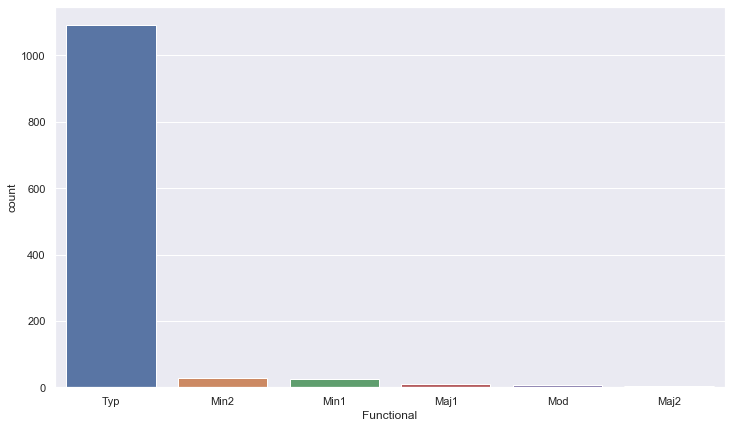

In [77]:
univariate_cat(house_data, 'Functional')

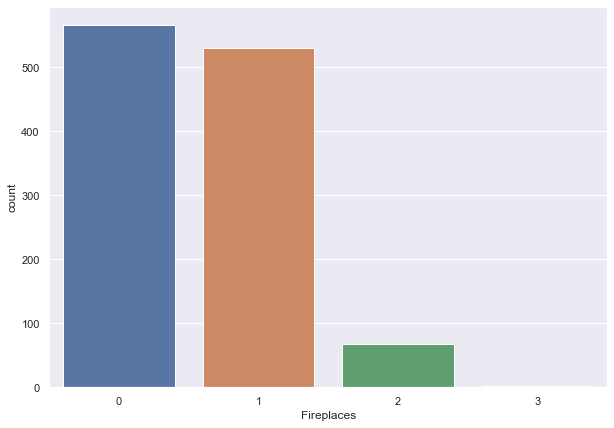

In [78]:
univariate_cat(house_data, 'Fireplaces')

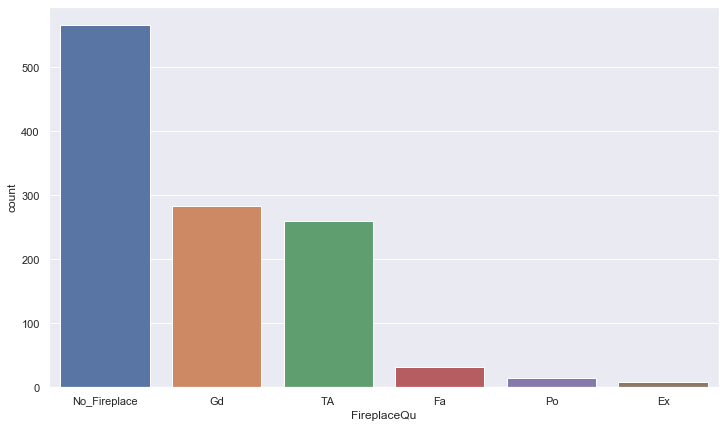

In [79]:
univariate_cat(house_data, 'FireplaceQu')

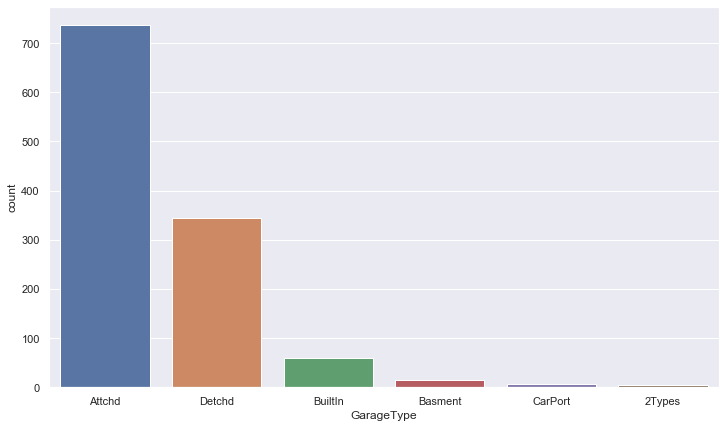

In [80]:
univariate_cat(house_data, 'GarageType')

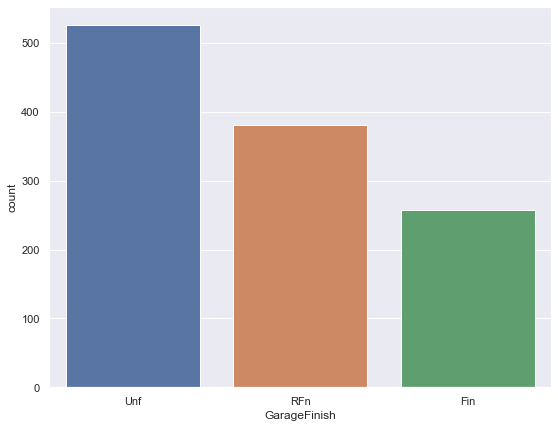

In [81]:
univariate_cat(house_data, 'GarageFinish')

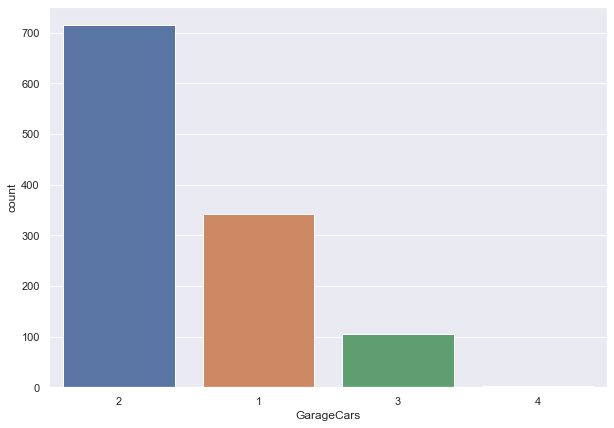

In [82]:
univariate_cat(house_data, 'GarageCars')

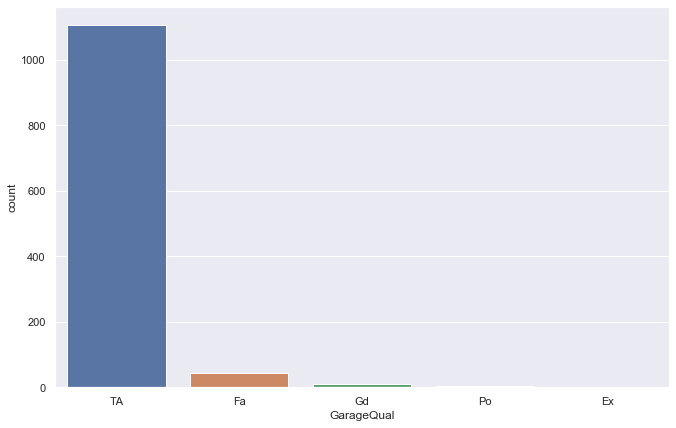

In [83]:
univariate_cat(house_data, 'GarageQual')

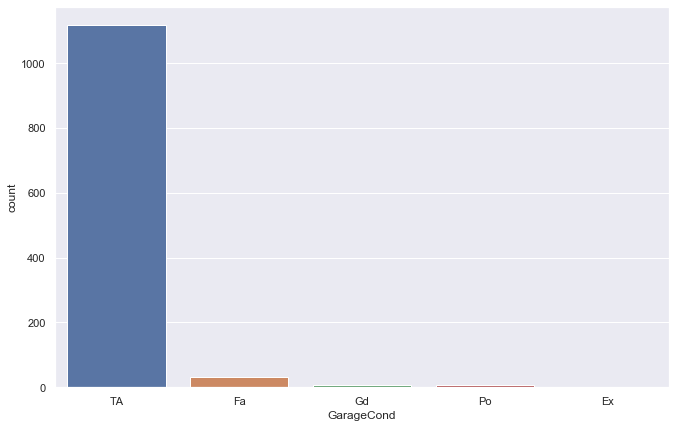

In [84]:
univariate_cat(house_data, 'GarageCond')

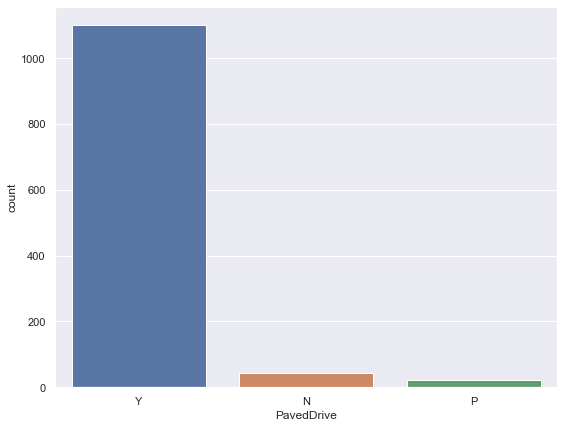

In [85]:
univariate_cat(house_data, 'PavedDrive')

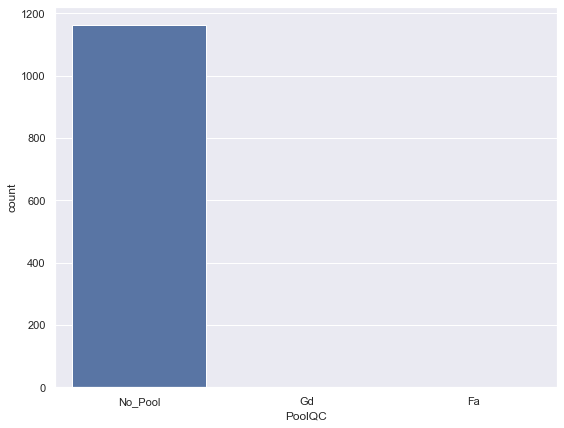

In [86]:
univariate_cat(house_data, 'PoolQC')

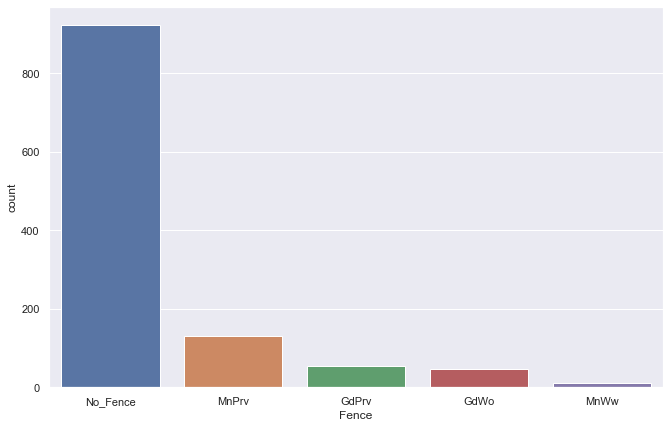

In [87]:
univariate_cat(house_data, 'Fence')

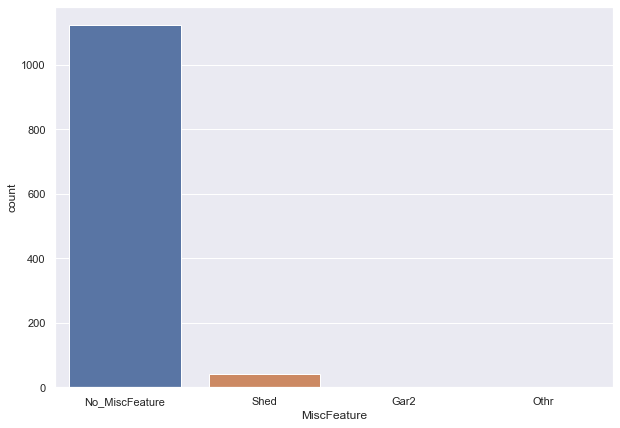

In [88]:
univariate_cat(house_data, 'MiscFeature')

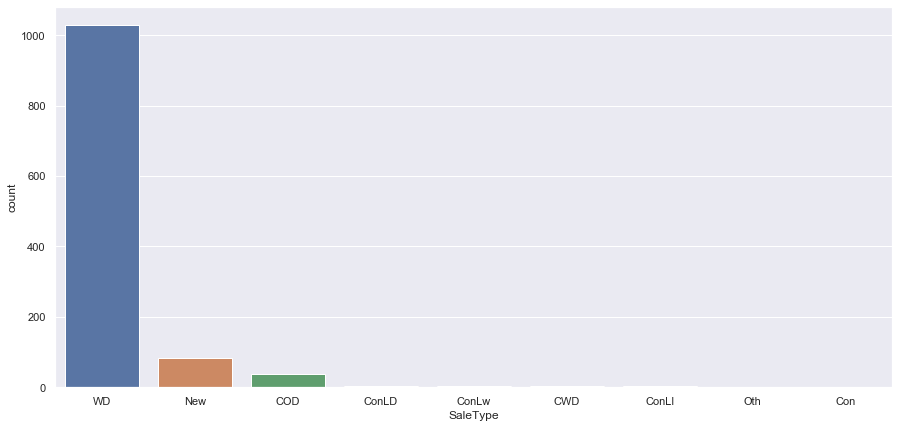

In [89]:
univariate_cat(house_data, 'SaleType')

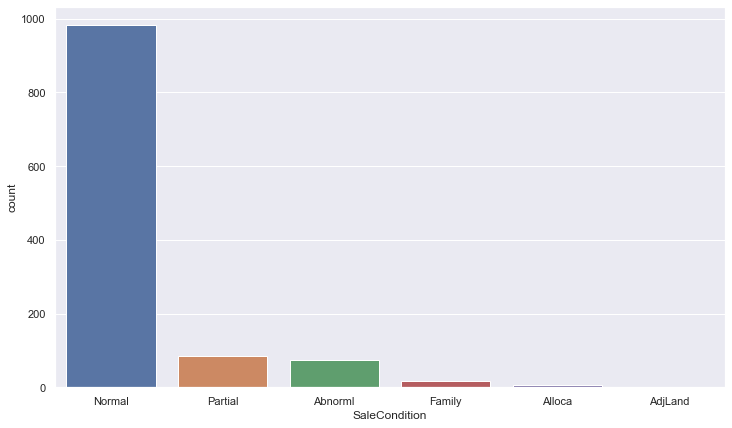

In [90]:
univariate_cat(house_data, 'SaleCondition')

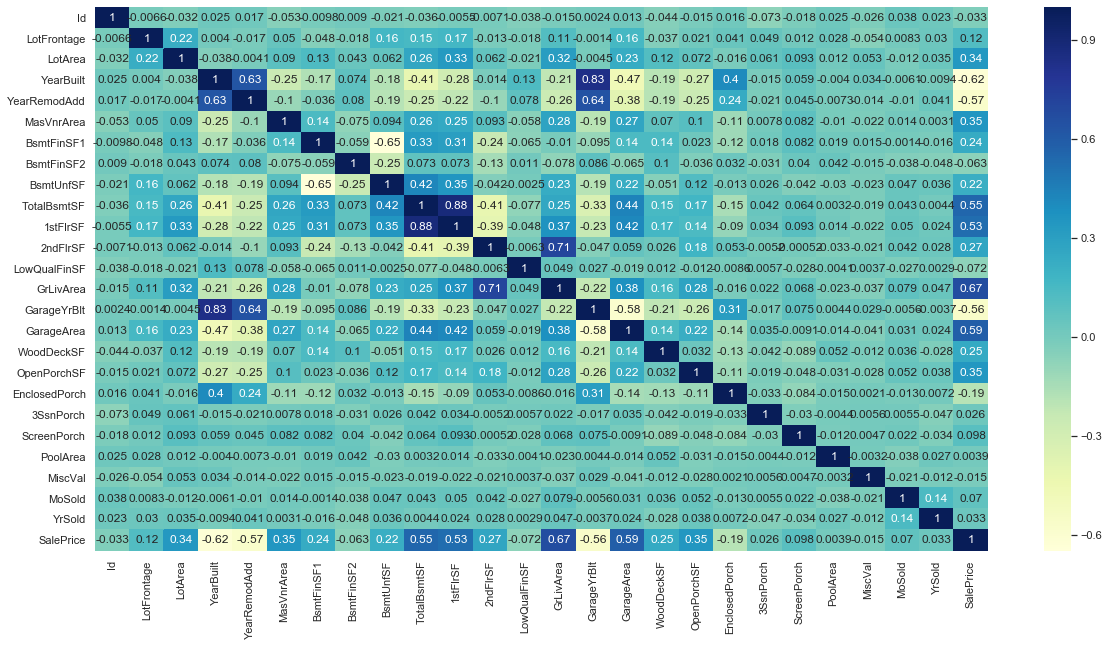

In [91]:
# plotting heatmap between variables
corr = house_data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

From the above we can see which variables are correlated heavily with SalePrice. Some of these are: YearBuilt, YearRemoddAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea. 

There also seems to few correlated variables. Let's proceed to model building.

## 4. Model Building

### 4.1 - Data Preparation

The data has to be prepped before building the model. The tasks involved are creating split into X and Y datasets, dummy variables, standardizing, splitting into training and test datasets.

In [92]:
X = house_data.copy()
X2 = house_data.drop('Id',axis=1) # dropping the ID Variable

In [93]:
# dummy variables
cat_cols = X2.select_dtypes(include=['object'])
cat_dummies = pd.get_dummies(cat_cols, drop_first=True)
cat_dummies.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [94]:
# dropping original categorical cols from X
X = X.drop(list(cat_cols.columns),axis=1)

In [95]:
# concatting dummy and original df
X = pd.concat([X, cat_dummies],axis=1)

In [96]:
X.shape

(1165, 288)

In [97]:
X.head()

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65,8450,16,16,196,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,2,80,9600,43,43,0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,3,68,11250,18,17,162,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,4,60,9550,104,49,0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,5,84,14260,19,19,350,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


After adding dummy variables, the dataframe has 305 columns and 1378 rows.

In [98]:
X = X.drop(['Id'],axis=1) # dropping Id and Sale Price

In [99]:
X.shape

(1165, 287)

In [100]:
scale_cols = X.iloc[:,0:25].columns
X[scale_cols].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65,8450,16,16,196,706,0,150,856,856,...,0,61,0,0,0,0,0,2,11,208500
1,80,9600,43,43,0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,12,181500
2,68,11250,18,17,162,486,0,434,920,920,...,0,42,0,0,0,0,0,9,11,223500
3,60,9550,104,49,0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,13,140000
4,84,14260,19,19,350,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,11,250000


In [101]:
# scaler object
scaler = StandardScaler()

# applying scaling
cols = X.columns
scale_cols = X.iloc[:,0:25].columns
X[scale_cols] = scaler.fit_transform(X[scale_cols])
X.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.296882,-0.238385,-1.046620,-0.879802,0.685709,0.734638,-0.298541,-1.002231,-0.580255,-0.843353,...,0,0,0,0,1,0,0,0,1,0
1,0.778188,0.145662,-0.117712,0.441918,-0.583593,1.431672,-0.298541,-0.687417,0.690246,0.467900,...,0,0,0,0,1,0,0,0,1,0
2,0.393143,0.696685,-0.977812,-0.830849,0.465524,0.170860,-0.298541,-0.335013,-0.379979,-0.636653,...,0,0,0,0,1,0,0,0,1,0
3,0.136446,0.128964,1.980932,0.735633,-0.583593,-0.521049,-0.298541,-0.085981,-0.893186,-0.504236,...,0,0,0,0,1,0,0,0,0,0
4,0.906537,1.701885,-0.943408,-0.732944,1.683017,0.603944,-0.298541,-0.203449,0.324116,0.090026,...,0,0,0,0,1,0,0,0,1,0


In [102]:
y = X.SalePrice # y dataset only has target variable SalePrice
X = X.drop(['SalePrice'],axis=1) # dropping Id and Sale Price

In [103]:
# splitting X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

### 4.2 - Ridge and Lasso Regression

#### Ridge Regression

In [104]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [105]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008387,0.002239,0.001393,4.896936e-04,0.0001,{'alpha': 0.0001},-0.285638,-0.272388,-0.304159,-0.279596,...,-0.282856,0.011739,26,-0.143299,-0.151937,-0.144873,-0.148008,-0.146315,-0.146886,0.002967
1,0.005385,0.000489,0.000997,1.507891e-07,0.001,{'alpha': 0.001},-0.286200,-0.270855,-0.303952,-0.278350,...,-0.282282,0.012129,25,-0.143348,-0.152002,-0.144897,-0.148116,-0.146430,-0.146958,0.002978
2,0.004588,0.000488,0.000797,3.987316e-04,0.01,{'alpha': 0.01},-0.284666,-0.261661,-0.302024,-0.272810,...,-0.278029,0.014119,24,-0.143588,-0.152643,-0.145133,-0.148956,-0.147052,-0.147474,0.003152
3,0.004389,0.000489,0.000997,4.768372e-07,0.05,{'alpha': 0.05},-0.278906,-0.247718,-0.295309,-0.261873,...,-0.268991,0.016466,23,-0.144487,-0.153797,-0.146082,-0.150714,-0.148553,-0.148727,0.003306
4,0.006982,0.004548,0.000997,4.422006e-07,0.1,{'alpha': 0.1},-0.274802,-0.242960,-0.289507,-0.254498,...,-0.263799,0.016407,22,-0.145540,-0.154611,-0.147181,-0.152218,-0.150010,-0.149912,0.003286


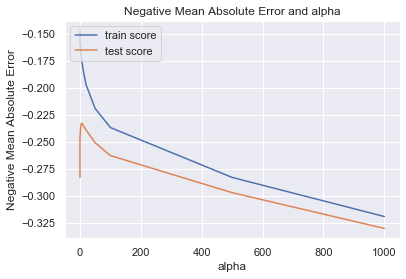

In [106]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [107]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 6.0}
-0.23279541800928732


In [108]:
cv_results[['param_alpha','mean_train_score','mean_test_score']].sort_values(by='mean_test_score', ascending = False).head()

,param_alpha,mean_train_score,mean_test_score
18,6,-0.174530,-0.232795
17,5,-0.172202,-0.232843
19,7,-0.176730,-0.233046
16,4,-0.169686,-0.233338
20,8,-0.178795,-0.233418


In [120]:
# model with optimal alpha
alpha = 6
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.0048736 ,  0.08668516, -0.18851383, -0.07735482,  0.03270187,
        0.09055642,  0.03271246, -0.00959626,  0.11340197,  0.0829433 ,
        0.14986428, -0.00881307,  0.21382596,  0.01180607,  0.05813793,
        0.04159792,  0.02690069,  0.02287203,  0.00919586,  0.04525202,
        0.01948994,  0.01418444,  0.01344953, -0.00088963,  0.04544528,
        0.01721183,  0.03799808,  0.01436824, -0.00900301,  0.05504509,
        0.02673054, -0.04549682, -0.03047519, -0.13225088,  0.02592017,
       -0.17132851,  0.01948833, -0.00931861,  0.19752133,  0.00532681,
        0.09006524, -0.03991284,  0.08370549,  0.07880206, -0.01937378,
        0.02744309, -0.08871791, -0.01236777,  0.02674114, -0.08463774,
       -0.07663088, -0.08231216, -0.0133657 , -0.10629344, -0.03285225,
        0.00612525,  0.00350746, -0.00093974,  0.        ,  0.06447703,
        0.12028112, -0.06931585, -0.04076456,  0.2375871 , -0.18265556,
       -0.1201734 , -0.08394671, -0.1553665 , -0.07149166, -0.08

In [121]:
# predicting values of training dataset
y_train_pred = ridge.predict(X_train)
print(np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred)))
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.2553519419928339
0.933930925768227


In [122]:
# predicting values of test dataset
y_test_pred = ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred)))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.28875420973645544
0.9190736294336636


#### Lasso Regression

In [123]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [124]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.076988,0.020178,0.001196,3.993803e-04,0.0001,{'alpha': 0.0001},-0.269328,-0.237811,-0.273322,-0.246346,...,-0.256402,0.013428,2,-0.148628,-0.157021,-0.148980,-0.155008,-0.152679,-0.152463,0.003291
1,0.037896,0.003938,0.000998,6.143617e-07,0.001,{'alpha': 0.001},-0.241299,-0.217509,-0.224739,-0.214389,...,-0.225245,0.009433,1,-0.172417,-0.178204,-0.174476,-0.180058,-0.178582,-0.176747,0.002841
2,0.009982,0.001672,0.000796,3.980723e-04,0.01,{'alpha': 0.01},-0.267383,-0.288420,-0.269929,-0.261395,...,-0.272973,0.009337,3,-0.255590,-0.251808,-0.249161,-0.253382,-0.250231,-0.252035,0.002281
3,0.005389,0.000475,0.000585,4.779430e-04,0.05,{'alpha': 0.05},-0.326701,-0.367502,-0.324789,-0.320780,...,-0.323943,0.027755,4,-0.315145,-0.302624,-0.312657,-0.312336,-0.316661,-0.311885,0.004899
4,0.005380,0.000802,0.000791,3.957126e-04,0.1,{'alpha': 0.1},-0.363340,-0.409210,-0.343056,-0.359598,...,-0.352485,0.039330,5,-0.344967,-0.338540,-0.341579,-0.346232,-0.353790,-0.345021,0.005142


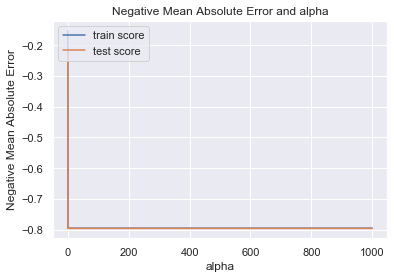

In [125]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [126]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.2252447055759987


In [127]:
cv_results[['param_alpha','mean_train_score','mean_test_score']].sort_values(by='mean_test_score', ascending = False).head()

,param_alpha,mean_train_score,mean_test_score
1,0.0010,-0.176747,-0.225245
0,0.0001,-0.152463,-0.256402
2,0.0100,-0.252035,-0.272973
3,0.0500,-0.311885,-0.323943
4,0.1000,-0.345021,-0.352485


In [128]:
# model with optimal alpha
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)
lasso.coef_

array([-1.45801705e-03,  7.95837676e-02, -2.01234367e-01, -6.96366358e-02,
        2.66958926e-02,  9.35171986e-02,  2.55472087e-02, -0.00000000e+00,
        1.04986789e-01,  0.00000000e+00,  2.84482015e-02, -2.04084126e-02,
        3.39269554e-01,  0.00000000e+00,  4.93789294e-02,  3.85832872e-02,
        2.18166932e-02,  1.80816745e-02,  5.04226220e-03,  4.66357739e-02,
        1.49829487e-02,  1.22765999e-02,  1.20769802e-02,  0.00000000e+00,
        1.28772822e-03, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -6.77222567e-04,
       -0.00000000e+00, -1.44013192e-01, -0.00000000e+00, -2.14760565e-01,
        0.00000000e+00,  0.00000000e+00,  3.22862000e-01,  0.00000000e+00,
        1.10545012e-01, -0.00000000e+00,  0.00000000e+00,  6.93413606e-02,
       -0.00000000e+00,  4.73019162e-03, -0.00000000e+00, -6.85638601e-04,
        0.00000000e+00, -3.64235505e-02, -5.31114632e-02, -0.00000000e+00,
       -0.00000000e+00, -

In [129]:
# predicting values on training df
y_train_pred = lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_true=y_train, y_pred=y_train_pred)))
print(r2_score(y_true=y_train, y_pred=y_train_pred))

0.2611160100649176
0.9309145018891687


In [130]:
# predicting values on test df
y_test_pred = lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_true=y_test, y_pred=y_test_pred)))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.2818787217346739
0.9228816016779025


The optimal lambda value for lasso regression is **0.001** and the optimal lambda value for ridge regression is **6**.

From the above, **lasso regression** produces RMSE of **0.261** and r^2 score of **0.931** on training dataset. It produces RMSE of **0.281** and r^2 score of **0.922** on the test dataset.

**Ridge regression** produces RMSE of **0.255** and r^2 score of **0.934** on the training dataset. It produces RMSE of **0.288** and r^2 score of **0.919** on the test dataset.

From the above metrics, we can see that the Lasso Regression is the best regularization method to choose.